# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.231608e+01     7.494899e+00
 * time: 0.0016939640045166016
     1     2.397163e+01     4.802349e+00
 * time: 0.007916927337646484
     2     1.833246e+01     5.180054e+00
 * time: 0.014050960540771484
     3     1.373428e+01     3.781854e+00
 * time: 0.020122051239013672
     4     1.046925e+01     1.548589e+00
 * time: 0.02591395378112793
     5     9.689037e+00     2.111647e+00
 * time: 0.031356096267700195
     6     9.156153e+00     1.143782e+00
 * time: 0.03605008125305176
     7     8.809164e+00     1.107503e+00
 * time: 0.04118704795837402
     8     8.553859e+00     1.029156e+00
 * time: 0.0464940071105957
     9     8.345035e+00     7.596112e-01
 * time: 0.05186009407043457
    10     8.218928e+00     5.078718e-01
 * time: 0.05777788162231445
    11     8.214913e+00     9.951734e-01
 * time: 0.06243109703063965
    12     8.200264e+00     7.329856e-01
 * time: 0.06701087951660156
    13     8.124769e+00     6.958489e-01
 * 

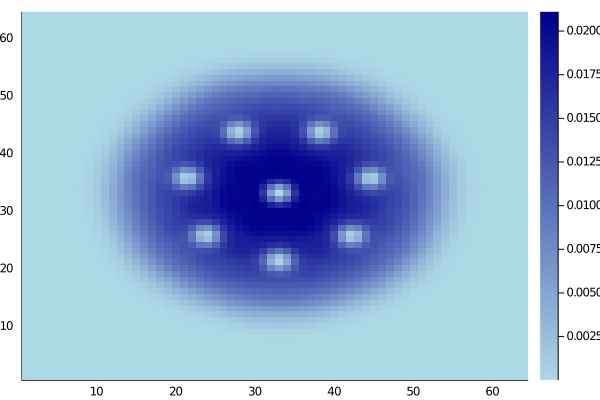

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model, Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ.real[:, :, 1], c=:blues)